In [3]:
#Importing Necessary modules
import geopandas as gpd
import pandas as pd
import numpy as np
from shapely.geometry import Point
import pandana as pdna
import matplotlib.pyplot as plt
from geosnap.analyze import isochrones_from_id, isochrones_from_gdf, pdna_to_adj 

/opt/tljh/user/lib/python3.10/site-packages/numba/core/decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
  warnings.warn(msg, NumbaDeprecationWarning)
/opt/tljh/user/lib/python3.10/site-packages/quantecon/lss.py:20: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def simulate_linear_model(A, x0, v, ts_length):


In [4]:
gdf = gpd.read_parquet("lodes.parquet")
#Reading the Previously Rendered parquet of Major Employment Centers (E.C.)

In [5]:
gdf.reset_index(inplace=True)
gdf = gdf[['geoid', 'year', 'total_employees', 'geometry']]
#resetting the index and trimming columns we don't need

In [6]:
gdf

,geoid,year,total_employees,geometry
0,060730004002000,2021,9995.0,"POLYGON ((-117.17087 32.75865, -117.17019 32.7..."
1,060730004004000,2021,4272.0,"POLYGON ((-117.16746 32.75917, -117.16684 32.7..."
2,060730028011010,2021,4007.0,"POLYGON ((-117.07673 32.77581, -117.07667 32.7..."
3,060730038001018,2021,4148.0,"POLYGON ((-117.12548 32.68390, -117.12545 32.6..."
4,060730053021009,2021,12455.0,"POLYGON ((-117.16385 32.71883, -117.16366 32.7..."
5,060730062001000,2021,5000.0,"POLYGON ((-117.20892 32.72950, -117.20892 32.7..."
6,060730083051007,2021,21112.0,"POLYGON ((-117.24241 32.88137, -117.24238 32.8..."
7,060730083051018,2021,4263.0,"POLYGON ((-117.23427 32.87316, -117.23426 32.8..."
8,060730083121001,2021,6133.0,"POLYGON ((-117.26240 32.93954, -117.26214 32.9..."
9,060730083391005,2021,4571.0,"POLYGON ((-117.26120 32.93794, -117.26120 32.9..."


In [7]:
gdf.explore()

In [8]:
import os
if not os.path.exists('./41740.h5'):
    import quilt3 as q3
    b = q3.Bucket("s3://spatial-ucr")
    b.fetch("osm/metro_networks_8k/41740.h5", "./41740.h5")

sd_network = pdna.Network.from_hdf5("./41740.h5")
#Creating a network as the basis to create Isocrones to measure what is within walking distance of the E.C.'s

Generating contraction hierarchies with 32 threads.
Setting CH node vector of size 332554
Setting CH edge vector of size 522484
Range graph removed 143094 edges of 1044968
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


In [9]:
iso = isochrones_from_gdf(gdf, threshold=400, network=sd_network)
#Creating 400 meter Isochromes around the employment centers
#This expands the employment centers to include areas within a 5-minute walk.

/opt/tljh/user/lib/python3.10/site-packages/geosnap/analyze/network.py:140: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  node_ids = network.get_node_ids(origins.centroid.x, origins.centroid.y).astype(int)
/opt/tljh/user/lib/python3.10/site-packages/geosnap/analyze/network.py:34: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  node_ids = network.get_node_ids(origins.centroid.x, origins.centroid.y).astype(int)


In [10]:
#Combining the isochrones and the original employment centers gdf
iso['geoid'] = gdf['geoid']
# Concatenate gdf and iso
combined = gpd.GeoDataFrame(pd.concat([gdf, iso], ignore_index=True))
# Dissolve based on the common attribute
dissolved = combined.dissolve(by='geoid')
#Reset the index to make sure it's consistent
dissolved.reset_index(inplace=True)

In [11]:
dissolved.explore()

In [12]:
print(dissolved.shape)
dissolved.head()

(31, 5)


,geoid,geometry,year,total_employees,distance
0,060730004002000,"POLYGON ((-117.17019 32.75878, -117.16816 32.7...",2021.0,9995.0,400.0
1,060730004004000,"POLYGON ((-117.16225 32.75187, -117.16319 32.7...",2021.0,4272.0,400.0
2,060730028011010,"POLYGON ((-117.07619 32.77583, -117.07515 32.7...",2021.0,4007.0,400.0
3,060730038001018,"POLYGON ((-117.12214 32.68123, -117.12225 32.6...",2021.0,4148.0,400.0
4,060730053021009,"POLYGON ((-117.16366 32.71883, -117.16311 32.7...",2021.0,12455.0,400.0


In [13]:
t_shape = gpd.read_file("~/project/Employment-Centers-/Data/RR_CA_Transit_Stops.shp")
#Importing the Shapefile for Transit Stops

In [14]:
t_shape = t_shape.to_crs(gdf.crs)
#Ensuring the new shapefile has the same CRS as the Employment polygons for proper spatial analysis

In [15]:
transit = gpd.sjoin(t_shape, dissolved, how="inner", op="intersects")
#Creating a new gdf, transit, that only includes transit stops in and around employment centers
del t_shape #deleting large raw transit data to reduce memory load

/opt/tljh/user/lib/python3.10/site-packages/IPython/core/interactiveshell.py:3493: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


In [16]:
important_columns = ['OBJECTID', 'agency', 'route_id', 'route_type', 'stop_id', 'stop_name', 'geoid', 'geometry']
transit = transit[important_columns]
transit.head()
#trimming columns

,OBJECTID,agency,route_id,route_type,stop_id,stop_name,geoid,geometry
78670,78671,North County Transit District,301,3,11538,N Torrey Pines Rd & Torrey Pines Scenic Dr,060730083121001,POINT (-117.24384 32.88747)
78672,78673,North County Transit District,301,3,11541,N Torrey Pines Rd & Science Park Rd,060730083121001,POINT (-117.24282 32.90142)
78674,78675,North County Transit District,301,3,11875,N Torrey Pines Rd & Almahurst Row,060730083121001,POINT (-117.24403 32.88046)
78676,78677,North County Transit District,301,3,11877,N Torrey Pines Rd & Salk Institute Rd,060730083121001,POINT (-117.24396 32.88579)
78677,78678,North County Transit District,301,3,11882,N Torrey Pines Rd & Scripps Clinic Drwy,060730083121001,POINT (-117.24126 32.89408)


In [17]:
m = dissolved.explore()
transit.explore(m=m, color='red')
#Seeing how transit stop points compare to employment center polygons

In [18]:
#Counting the number of transit stops each employment center has

# Group transit by geoid and count the number of points in each group
point_counts = transit.groupby('geoid').size().reset_index(name='total_transit')

# Merge the point counts back into the dissolved GeoDataFrame based on the geoid
dissolved_with_counts = dissolved.merge(point_counts, on='geoid', how='left')

# Fill NaN values in case there are polygons without any points
dissolved_with_counts['total_transit'].fillna(0, inplace=True)

# Optionally, convert the total_transit column to integer type
dissolved_with_counts['total_transit'] = dissolved_with_counts['total_transit'].astype(int)

# Print the dissolved GeoDataFrame with the new "total_transit" column
dissolved_with_counts.head()


,geoid,geometry,year,total_employees,distance,total_transit
0,060730004002000,"POLYGON ((-117.17019 32.75878, -117.16816 32.7...",2021.0,9995.0,400.0,2
1,060730004004000,"POLYGON ((-117.16225 32.75187, -117.16319 32.7...",2021.0,4272.0,400.0,0
2,060730028011010,"POLYGON ((-117.07619 32.77583, -117.07515 32.7...",2021.0,4007.0,400.0,0
3,060730038001018,"POLYGON ((-117.12214 32.68123, -117.12225 32.6...",2021.0,4148.0,400.0,0
4,060730053021009,"POLYGON ((-117.16366 32.71883, -117.16311 32.7...",2021.0,12455.0,400.0,33


In [19]:
#Recording the number of different transit types available for each employment center

# Group transit by geoid and count the number of unique route_types in each group
transit_types_counts = transit.groupby('geoid')['route_type'].nunique().reset_index()

# Merge the route type counts back into the dissolved_with_counts GeoDataFrame based on the geoid
dissolved_with_counts = dissolved_with_counts.merge(transit_types_counts, on='geoid', how='left')

# Rename the column to "transit_types"
dissolved_with_counts.rename(columns={'route_type': 'transit_types'}, inplace=True)

# Fill NaN values in case there are polygons without any transit types
dissolved_with_counts['transit_types'].fillna(0, inplace=True)

# Optionally, convert the transit_types column to integer type
dissolved_with_counts['transit_types'] = dissolved_with_counts['transit_types'].astype(int)

# Print the dissolved_with_counts GeoDataFrame with the new "transit_types" column
dissolved_with_counts.head()

,geoid,geometry,year,total_employees,distance,total_transit,transit_types
0,060730004002000,"POLYGON ((-117.17019 32.75878, -117.16816 32.7...",2021.0,9995.0,400.0,2,1
1,060730004004000,"POLYGON ((-117.16225 32.75187, -117.16319 32.7...",2021.0,4272.0,400.0,0,0
2,060730028011010,"POLYGON ((-117.07619 32.77583, -117.07515 32.7...",2021.0,4007.0,400.0,0,0
3,060730038001018,"POLYGON ((-117.12214 32.68123, -117.12225 32.6...",2021.0,4148.0,400.0,0,0
4,060730053021009,"POLYGON ((-117.16366 32.71883, -117.16311 32.7...",2021.0,12455.0,400.0,33,2


In [20]:
#interactive map to spatially explore employment centers with transit data
dissolved_with_counts.explore()

In [21]:
#Choropleth map comparing number of transit stops at employment centers
m = dissolved_with_counts.explore(
    column="total_transit",  # make choropleth based on "total_transit" column
    cmap='viridis',
    tiles='cartodbdark_matter',
    scheme="naturalbreaks",  # use mapclassify's natural breaks scheme
    legend=True,  # show legend
    k=10,  # use 10 bins
    tooltip=False,  # hide tooltip
    popup=["total_transit"],  # show popup (on-click)
    legend_kwds=dict(colorbar=False),  # do not use colorbar
    name="dissolved_with_counts"  # name of the layer in the map
)
m

In [27]:
#Choropleth map comparing number of different types of transit stops at employment centers
dissolved_with_counts.explore(
    column="transit_types",  # make choropleth based on "total_transit" column
    cmap='viridis',
    tiles='cartodbdark_matter',
    scheme="naturalbreaks",  # use mapclassify's natural breaks scheme
    legend=True,  # show legend
   ## k=10,  # use 10 bins
    tooltip=False,  # hide tooltip
    popup=["transit_types"],  # show popup (on-click)
    legend_kwds=dict(colorbar=False),  # do not use colorbar
    name="dissolved_with_counts"  # name of the layer in the map
)

/opt/tljh/user/lib/python3.10/site-packages/mapclassify/classifiers.py:686: UserWarning: Not enough unique values in array to form 5 classes. Setting k to 3.
  self._classify()


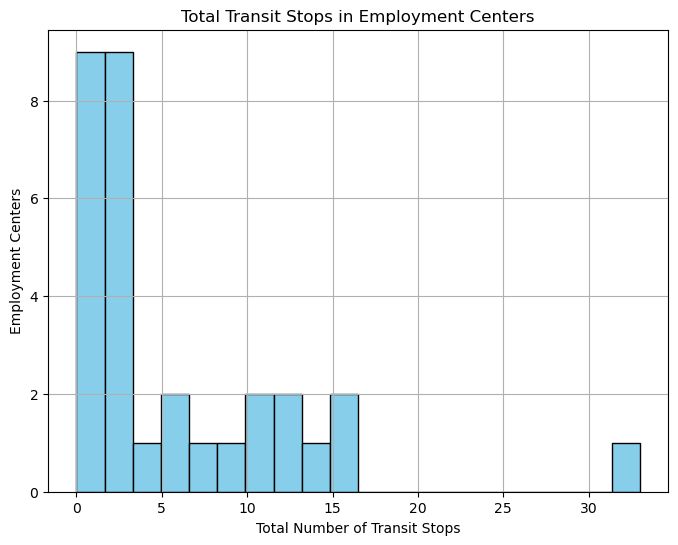

In [23]:
#Plotting the total number of transit stops in each Employment Center
plt.figure(figsize=(8, 6))
dissolved_with_counts['total_transit'].plot.hist(bins=20, color='skyblue', edgecolor='black')
plt.title('Total Transit Stops in Employment Centers')
plt.xlabel('Total Number of Transit Stops')
plt.ylabel('Employment Centers')
plt.grid(True)
plt.show()

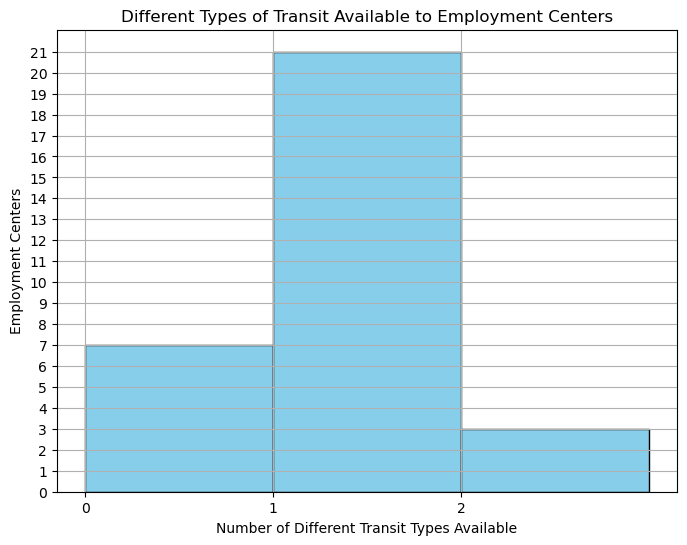

In [24]:
#Histogram to visualize types of transit in Employment Centers
# Calculate the range for the histogram bins
bin_min = int(dissolved_with_counts['transit_types'].min())
bin_max = int(dissolved_with_counts['transit_types'].max())

# Plot histogram
plt.figure(figsize=(8, 6))
n, bins, patches = plt.hist(dissolved_with_counts['transit_types'], bins=np.arange(bin_min, bin_max + 2, 1), color='skyblue', edgecolor='black')
plt.title('Different Types of Transit Available to Employment Centers')
plt.xlabel('Number of Different Transit Types Available')
plt.ylabel('Employment Centers')
plt.xticks(np.arange(bin_min, bin_max + 1, 1))  # Set x-ticks to integers
plt.yticks(np.arange(0, int(max(n)) + 1, 1))  # Set y-ticks to integers
plt.grid(True)
plt.show()



In [25]:
transit['route_type'] = transit['route_type'].astype(int)

#Renaming Transit Types based on GTFS reference
route_type_mapping = {
    0: 'Tram, Streetcar, Light rail',
    1: 'Subway, Metro',
    2: 'Rail',
    3: 'Bus',
    4: 'Ferry'
}

transit['route_type_name'] = transit['route_type'].map(route_type_mapping)


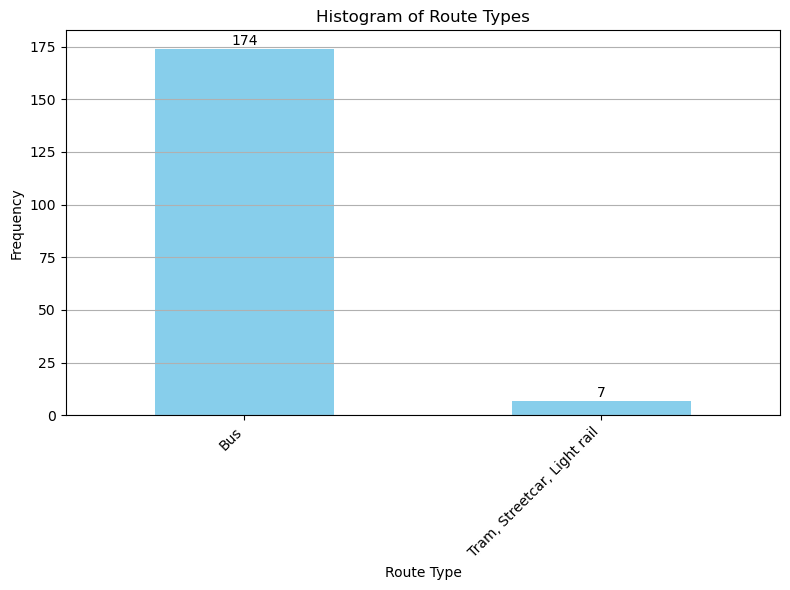

In [26]:
#Plot of different types of transit available
plt.figure(figsize=(8, 6))
ax = transit['route_type_name'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Histogram of Route Types')
plt.xlabel('Route Type')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')

# Add labels above the bars
for i in ax.patches:
    plt.text(i.get_x() + i.get_width() / 2, i.get_height() + 0.5, str(i.get_height()), ha='center', va='bottom')

plt.tight_layout()
plt.show()

